In [2]:
import mbuild as mb

Ininitialize a single Argon atom, then use the fill box command to create a bulk system

In [4]:
argon = mb.Compound(pos=[0.0, 0.0, 0.0], name='Ar')
argon_bulk = mb.fill_box(compound=argon, n_compounds=1000, box=[10.0,10.0,10.0])

Visualize the system

In [5]:
argon_bulk.visualize()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The Foyer XML file contains the parameters for argon

In [6]:
!cat argon.xml

<ForceField>
    <AtomTypes>
        <Type name="Ar" def="[Ar]"
              class="Ar" element="Ar" mass="1.0"
              desc="Argon atom"/>
    </AtomTypes>
    <NonbondedForce coulomb14scale="1.0" lj14scale="1.0">
        <Atom type="Ar" charge="0" sigma="0.34" epsilon="1.0"/>
    </NonbondedForce>
</ForceField>


Write the gromacs files to disk, applying the argon.xml forcefield file to the system

In [7]:
argon_bulk.save('argon_bulk.gro', overwrite=True)
argon_bulk.save('argon_bulk.top', forcefield_files='argon.xml', overwrite=True)

/Users/cri/Projects/mosdef_code/foyer/foyer/forcefield.py:433: UserWarning: No force field version number found in force field XML file.
  'No force field version number found in force field XML file.'
/Users/cri/Projects/mosdef_code/foyer/foyer/forcefield.py:445: UserWarning: No force field name found in force field XML file.
  'No force field name found in force field XML file.'
/Users/cri/anaconda3/lib/python3.6/site-packages/parmed/openmm/topsystem.py:238: OpenMMWarning: Adding what seems to be Urey-Bradley terms before Angles. This is unexpected, but the parameters will all be present in one form or another.
  'all be present in one form or another.', OpenMMWarning)


Run an energy minimization step followed by a short NVE simulation

In [8]:
!gmx grompp -f em.mdp -c argon_bulk.gro -p argon_bulk.top -o em.tpr
!gmx mdrun -v -deffnm em

                      :-) GROMACS - gmx grompp, 2019.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

Step=  132, Dmax= 3.1e-02 nm, Epot= -7.89581e+02 Fmax= 2.54723e+01, atom= 420
Step=  133, Dmax= 3.7e-02 nm, Epot= -7.91787e+02 Fmax= 8.70805e+01, atom= 420
Step=  134, Dmax= 4.4e-02 nm, Epot= -7.95458e+02 Fmax= 3.69488e+01, atom= 420
Step=  135, Dmax= 5.3e-02 nm, Epot= -7.97022e+02 Fmax= 1.25435e+02, atom= 420
Step=  136, Dmax= 6.4e-02 nm, Epot= -8.00515e+02 Fmax= 4.82232e+01, atom= 420
Step=  137, Dmax= 7.6e-02 nm, Epot= -8.00532e+02 Fmax= 1.75855e+02, atom= 420
Step=  138, Dmax= 9.2e-02 nm, Epot= -8.04809e+02 Fmax= 4.93515e+01, atom= 420
Step=  140, Dmax= 5.5e-02 nm, Epot= -8.09418e+02 Fmax= 2.75868e+01, atom= 260
Step=  142, Dmax= 3.3e-02 nm, Epot= -8.12017e+02 Fmax= 3.97358e+01, atom= 260
Step=  143, Dmax= 4.0e-02 nm, Epot= -8.14146e+02 Fmax= 3.98078e+01, atom= 473
Step=  145, Dmax= 2.4e-02 nm, Epot= -8.17462e+02 Fmax= 1.52659e+01, atom= 473
Step=  146, Dmax= 2.9e-02 nm, Epot= -8.18533e+02 Fmax= 6.55989e+01, atom= 473
Step=  147, Dmax= 3.4e-02 nm, Epot= -8.22473e+02 Fmax= 2.50505e+

Step=  248, Dmax= 3.5e-02 nm, Epot= -9.79713e+02 Fmax= 6.21960e+01, atom= 420
Step=  249, Dmax= 4.2e-02 nm, Epot= -9.80426e+02 Fmax= 8.48724e+01, atom= 420
Step=  250, Dmax= 5.1e-02 nm, Epot= -9.81371e+02 Fmax= 9.12709e+01, atom= 420
Step=  251, Dmax= 6.1e-02 nm, Epot= -9.81994e+02 Fmax= 9.35901e+01, atom= 420
Step=  252, Dmax= 7.3e-02 nm, Epot= -9.82839e+02 Fmax= 1.10586e+02, atom= 420
Step=  253, Dmax= 8.8e-02 nm, Epot= -9.83398e+02 Fmax= 9.49184e+01, atom= 420
Step=  255, Dmax= 5.3e-02 nm, Epot= -9.86717e+02 Fmax= 2.35599e+01, atom= 569
Step=  257, Dmax= 3.2e-02 nm, Epot= -9.89095e+02 Fmax= 9.11974e+01, atom= 420
Step=  258, Dmax= 3.8e-02 nm, Epot= -9.90951e+02 Fmax= 3.81589e+01, atom= 420
Step=  259, Dmax= 4.5e-02 nm, Epot= -9.91208e+02 Fmax= 1.22629e+02, atom= 420
Step=  260, Dmax= 5.5e-02 nm, Epot= -9.92921e+02 Fmax= 5.78431e+01, atom= 420
Step=  262, Dmax= 3.3e-02 nm, Epot= -9.95119e+02 Fmax= 1.68027e+01, atom= 314
Step=  264, Dmax= 2.0e-02 nm, Epot= -9.97316e+02 Fmax= 4.34571e+

Step=  489, Dmax= 1.7e-02 nm, Epot= -1.22350e+03 Fmax= 4.95371e+01, atom= 420
Step=  490, Dmax= 2.1e-02 nm, Epot= -1.22403e+03 Fmax= 4.56360e+01, atom= 420
Step=  491, Dmax= 2.5e-02 nm, Epot= -1.22433e+03 Fmax= 6.85898e+01, atom= 420
Step=  492, Dmax= 3.0e-02 nm, Epot= -1.22485e+03 Fmax= 6.62837e+01, atom= 420
Step=  493, Dmax= 3.6e-02 nm, Epot= -1.22493e+03 Fmax= 9.41871e+01, atom= 420
Step=  494, Dmax= 4.3e-02 nm, Epot= -1.22537e+03 Fmax= 9.25461e+01, atom= 420
Step=  496, Dmax= 2.6e-02 nm, Epot= -1.22702e+03 Fmax= 1.24694e+01, atom= 139
Step=  498, Dmax= 1.6e-02 nm, Epot= -1.22820e+03 Fmax= 6.56649e+01, atom= 420
Step=  499, Dmax= 1.9e-02 nm, Epot= -1.22905e+03 Fmax= 3.59829e+01, atom= 420
Step=  500, Dmax= 2.2e-02 nm, Epot= -1.22934e+03 Fmax= 6.98049e+01, atom= 420
Step=  501, Dmax= 2.7e-02 nm, Epot= -1.23009e+03 Fmax= 5.11024e+01, atom= 420
Step=  503, Dmax= 1.6e-02 nm, Epot= -1.23087e+03 Fmax= 1.73002e+01, atom= 420
Step=  504, Dmax= 1.9e-02 nm, Epot= -1.23156e+03 Fmax= 8.06675e+

Step=  596, Dmax= 2.2e-02 nm, Epot= -1.29070e+03 Fmax= 4.53106e+01, atom= 420
Step=  597, Dmax= 2.7e-02 nm, Epot= -1.29097e+03 Fmax= 7.65604e+01, atom= 420
Step=  598, Dmax= 3.2e-02 nm, Epot= -1.29162e+03 Fmax= 6.66766e+01, atom= 420
Step=  600, Dmax= 1.9e-02 nm, Epot= -1.29268e+03 Fmax= 1.36399e+01, atom= 420
Step=  601, Dmax= 2.3e-02 nm, Epot= -1.29323e+03 Fmax= 1.28696e+02, atom= 420
Step=  602, Dmax= 2.8e-02 nm, Epot= -1.29516e+03 Fmax= 3.78943e+01, atom= 420
Step=  604, Dmax= 1.7e-02 nm, Epot= -1.29578e+03 Fmax= 3.81933e+01, atom= 420
Step=  605, Dmax= 2.0e-02 nm, Epot= -1.29635e+03 Fmax= 5.29659e+01, atom= 420
Step=  606, Dmax= 2.4e-02 nm, Epot= -1.29698e+03 Fmax= 5.54396e+01, atom= 420
Step=  607, Dmax= 2.9e-02 nm, Epot= -1.29745e+03 Fmax= 7.38751e+01, atom= 420
Step=  608, Dmax= 3.4e-02 nm, Epot= -1.29801e+03 Fmax= 7.87110e+01, atom= 420
Step=  609, Dmax= 4.1e-02 nm, Epot= -1.29827e+03 Fmax= 1.01202e+02, atom= 420
Step=  610, Dmax= 5.0e-02 nm, Epot= -1.29868e+03 Fmax= 1.07481e+

Step=  744, Dmax= 1.9e-02 nm, Epot= -1.37588e+03 Fmax= 1.35342e+01, atom= 420
Step=  745, Dmax= 2.3e-02 nm, Epot= -1.37620e+03 Fmax= 1.27245e+02, atom= 420
Step=  746, Dmax= 2.7e-02 nm, Epot= -1.37806e+03 Fmax= 3.74481e+01, atom= 420
Step=  748, Dmax= 1.6e-02 nm, Epot= -1.37862e+03 Fmax= 3.82595e+01, atom= 420
Step=  749, Dmax= 2.0e-02 nm, Epot= -1.37912e+03 Fmax= 5.21594e+01, atom= 420
Step=  750, Dmax= 2.4e-02 nm, Epot= -1.37967e+03 Fmax= 5.54179e+01, atom= 420
Step=  751, Dmax= 2.8e-02 nm, Epot= -1.38005e+03 Fmax= 7.28755e+01, atom= 420
Step=  752, Dmax= 3.4e-02 nm, Epot= -1.38053e+03 Fmax= 7.85703e+01, atom= 420
Step=  753, Dmax= 4.1e-02 nm, Epot= -1.38072e+03 Fmax= 9.99945e+01, atom= 420
Step=  754, Dmax= 4.9e-02 nm, Epot= -1.38103e+03 Fmax= 1.07281e+02, atom= 420
Step=  756, Dmax= 2.9e-02 nm, Epot= -1.38312e+03 Fmax= 1.41559e+01, atom= 139
Step=  758, Dmax= 1.8e-02 nm, Epot= -1.38477e+03 Fmax= 5.41520e+01, atom= 420
Step=  759, Dmax= 2.1e-02 nm, Epot= -1.38551e+03 Fmax= 5.65813e+

In [9]:
!gmx grompp -f nve.mdp -c em.gro -p argon_bulk.top -o nve.tpr
!gmx mdrun -v -deffnm nve

                      :-) GROMACS - gmx grompp, 2019.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [10]:
import panedr
import matplotlib.pyplot as plt

In [11]:
df = panedr.edr_to_df('nve.edr')
df.describe()

,Time,LJ (SR),Coulomb (SR),Potential,Kinetic En.,Total Energy,Temperature,Pressure,Vir-XX,Vir-XY,...,Pres-XY,Pres-XZ,Pres-YX,Pres-YY,Pres-YZ,Pres-ZX,Pres-ZY,Pres-ZZ,#Surf*SurfTen,T-rest
count,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,50.000000,-1250.388944,0.0,-1250.388944,999.398969,-250.989975,80.213597,4.168308,206.698165,-0.590879,...,0.023595,-0.134619,0.023594,4.356290,-0.139136,-0.134619,-0.139135,4.045395,-1.843686,80.213597
std,28.910811,68.956832,0.0,68.956832,68.840039,0.129224,5.525228,1.768307,62.640369,28.499080,...,1.029572,0.977229,1.029572,2.031064,1.019054,0.977228,1.019054,2.155556,17.013617,5.525228
min,0.000000,-1496.167358,0.0,-1496.167358,794.092529,-251.216553,63.735325,-6.230714,-548.298889,-79.179993,...,-3.909876,-3.471956,-3.909851,-6.544624,-3.402851,-3.471958,-3.402830,-5.990545,-60.593864,63.735325
25%,25.000000,-1311.454590,0.0,-1311.454590,953.663269,-251.102295,76.542763,3.345344,172.699203,-19.334244,...,-0.632500,-0.784392,-0.632525,3.184482,-0.818833,-0.784384,-0.818800,2.849750,-13.018904,76.542763
50%,50.000000,-1254.876587,0.0,-1254.876587,1003.831421,-250.986023,80.569351,4.091965,207.073914,-0.781219,...,0.035703,-0.078465,0.035695,4.288365,-0.115828,-0.078467,-0.115851,4.049294,-1.367428,80.569351
75%,75.000000,-1204.563965,0.0,-1204.563965,1060.302490,-250.863525,85.101822,4.994886,239.912781,16.749298,...,0.658642,0.568845,0.658641,5.519590,0.541683,0.568806,0.541704,5.231101,9.591505,85.101822
max,100.000000,-1044.886597,0.0,-1044.886597,1245.377319,-250.785889,99.956268,29.027575,476.812622,120.366257,...,2.942359,2.312322,2.942342,27.718639,3.086603,2.312334,3.086657,30.000534,54.231770,99.956268


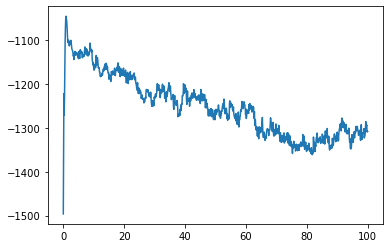

In [12]:
plt.plot(df['Time'], df['Potential'])

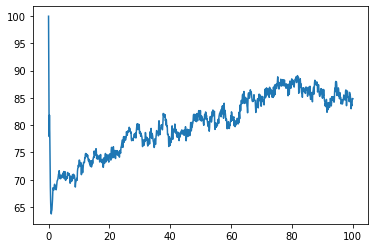

In [13]:
plt.plot(df['Time'], df['Temperature'])